<a href="https://colab.research.google.com/github/scips/machine-learning/blob/master/images_analysis_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Machine setup

Rajouter la carte Graphique

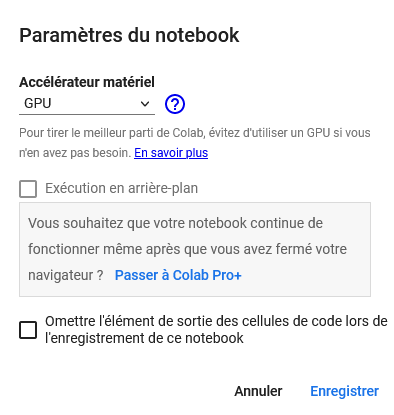

In [1]:
!/opt/bin/nvidia-smi

Thu Aug  4 13:37:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Pip Install

In [2]:
!pip install -q keras
!pip install -q opencv-python

## Install Yolo V3 (and compile it)

In [3]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 6.71 MiB/s, done.
Resolving deltas: 100% (3931/3931), done.


## Install Cuda

In [4]:
!apt update
!apt upgrade
!apt install cuda-11-2

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [87.8 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [901 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/u

## Add Bin Path

In [5]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

## Use GPU with Tolo V3 Darknet

In [37]:
%cd /content/darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!grep GPU Makefile
!sed -i 's/compute_30/compute_50/g' Makefile
!sed -i 's/sm_30/sm_50/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!grep compute_50 Makefile
!grep sm_50 Makefile
!grep OPENCV Makefile

/content/darknet
GPU=1
ifeq ($(GPU), 1) 
COMMON+= -DGPU -I/usr/local/cuda/include/
CFLAGS+= -DGPU
ifeq ($(GPU), 1) 
ARCH= -gencode arch=compute_50,code=sm_50 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
ARCH= -gencode arch=compute_50,code=sm_50 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
OPENCV=1
ifeq ($(OPENCV), 1) 
COMMON+= -DOPENCV
CFLAGS+= -DOPENCV


## Make it

In [38]:
!make

gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:1011:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Of

# Training

## get best model weight
*from darknet*

In [15]:
!curl -O https://pjreddie.com/media/files/darknet53.conv.74

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  154M  100  154M    0     0  14.5M      0  0:00:10  0:00:10 --:--:-- 17.2M


## Train our data

### Get the data from Github

#### Create Github access

In [16]:
!ssh-keygen -t rsa -b 4096
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts
!cat /root/.ssh/id_rsa.pub

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:uP5vrNTA+Prlgn3HZ8yigU4aI+YFSiTSfgIuc+VTDbg root@2eda1e96a31a
The key's randomart image is:
+---[RSA 4096]----+
|     ..          |
| .  .  o         |
|+ o ... .        |
|o= oE. +         |
|o.= = o S        |
|.+ + o o +       |
|  . o =o=.+. o   |
|   o +.Ooo+.+ =  |
|    . +o=*+o +   |
+----[SHA256]-----+
# github.com:22 SSH-2.0-babeld-f50a2ace
ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQCtX/lre4zWUhbWHD18pYa4dbXE84q2wjrmi41ZAus2gKjVEeuRfF1pctXMUWPOD2/tK+aqMy8w9A76uUb3GgGbT9+Fj6/50MCVkD+zOSy9+i1KW51gBqELkEzpgNA237bB4mpftJlakUBx+ug46KHomp9/vnqiI1L+XlLzvKbQ+VRtKGXWzwljAJT9VuReHDc/Wxcm2iYjTQvZA6uLGPgKCgZYoElQIjb6TtNeNeJ8bo4aBxL5NyVW7Au173VYk6XOcn

### Download data from github

Github: https://github.com/RTBF/annotation-images-box-detector

In [17]:
%cd /content
!git clone git@github.com:RTBF/annotation-images-box-detector.git
!cd annotation-images-box-detector && git pull && git checkout main

/content
Cloning into 'annotation-images-box-detector'...
remote: Enumerating objects: 991, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 991 (delta 14), reused 151 (delta 10), pack-reused 830
Receiving objects: 100% (991/991), 775.51 MiB | 8.61 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Checking out files: 100% (1646/1646), done.
Already up to date.
Already on 'main'
Your branch is up to date with 'origin/main'.


In [22]:
#@title Git Pull
!cd /content/annotation-images-box-detector && git pull
!ls data/darknet/obj | head -15

remote: Enumerating objects: 898, done.
remote: Counting objects: 100% (898/898), done.
remote: Compressing objects: 100% (823/823), done.
remote: Total 896 (delta 0), reused 896 (delta 0), pack-reused 0
Receiving objects: 100% (896/896), 775.46 MiB | 8.48 MiB/s, done.
From github.com:RTBF/annotation-images-box-detector
   f142e52..681f87e  main       -> origin/main
Updating f142e52..681f87e
Checking out files: 100% (1638/1638), done.
Fast-forward
 data/darknet/obj/image_0001.png | Bin 0 -> 1495060 bytes
 data/darknet/obj/image_0001.txt |   1 +
 data/darknet/obj/image_0002.png | Bin 0 -> 1249909 bytes
 data/darknet/obj/image_0002.txt |   1 +
 data/darknet/obj/image_0003.png | Bin 0 -> 1566382 bytes
 data/darknet/obj/image_0003.txt |   1 +
 data/darknet/obj/image_0004.png | Bin 0 -> 898933 bytes
 data/darknet/obj/image_0004.txt |   1 +
 data/darknet/obj/image_0005.png | Bin 0 -> 1112171 bytes
 data/darknet/obj/image_0005.txt |   1 +
 data/darknet/obj/image_0006.png | Bin 0 -> 1254912 by

### Création des listes d'images / textes à entraîner

In [46]:
!rm /content/annotation-images-box-detector/data/darknet/train.list /content/annotation-images-box-detector/data/darknet/test.list
!cd /content/annotation-images-box-detector/data/darknet/ && CNT=0; for i in `ls obj/*.png`; do if (( $CNT % 5 == 0)); then echo "$i" >> test.list; else echo "$i" >> train.list; fi; CNT=$((CNT+1)); done
!sed -i 's/^obj\//data\/obj\//g' /content/annotation-images-box-detector/data/darknet/train.list
!sed -i 's/^obj\//data\/obj\//g' /content/annotation-images-box-detector/data/darknet/test.list
!head -2 /content/annotation-images-box-detector/data/darknet/train.list
!echo ....
!tail -2 /content/annotation-images-box-detector/data/darknet/train.list
!head -2 /content/annotation-images-box-detector/data/darknet/test.list
!echo ....
!tail -2 /content/annotation-images-box-detector/data/darknet/test.list


data/obj/image_0002.png
data/obj/image_0003.png
....
data/obj/image_5142.png
data/obj/image_5143.png
data/obj/image_0001.png
data/obj/image_0006.png
....
data/obj/image_5135.png
data/obj/image_5140.png


## On déplace tout dans Yolo V3 Darknet

In [48]:
!rsync -a -v /content/annotation-images-box-detector/data/darknet/ /content/darknet/data/

sending incremental file list
./
test.list
train.list

sent 57,106 bytes  received 58 bytes  114,328.00 bytes/sec
total size is 891,752,503  speedup is 15,599.90


In [49]:
#@title Create the classification file
!echo "HABILLAGETITRE" > /content/darknet/data/obj.data
!cat /content/darknet/data/obj.data

HABILLAGETITRE


## lancer l'entraînement

In [ ]:
!cd /content/darknet/
!cd /content/darknet/ && ./darknet detector train data/obj.data cfg/yolov3.cfg darknet53.conv.74 -dont_show

train: Using default 'data/train.list'
backup: Using default '/backup/'
yolov3
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x

In [ ]:
#@title Test Upload
from google.colab import files
files.upload()


# Images Analysis Training

## Contexte

Le JT de 19h30 est diffusé 

## Objectif

Détecter les séquences d'un JT et les nommer en fonction du titre de la séquence présent dans l'image

## Guts feeling

On peut découper le problème en plusieurs parties. Et créer une chaine d'élément IA qui accomplissent chacun une petite étape.

* Détection du cadre
* Extraction du texte

1. Détecter la zone dans laquelle le texte apparait: rectangle avec (\[x1,y1\];\[x2;y2\]) et seul x2 est à trouver
2. Extraire les images avec le texte
3. Entrainer l'OCR **PyTesseract** sur base de ces images
4. Passer dans l'OCR pour obtenir le texte

### Idées

* L'utilisation de plusieurs images (8 par exemple) permettrait de résoudre les problèmes de transparence et de mouvement --> Tensor.
* Entraîner PyTeserac avec la font RTBF permettrait d'avoir un meilleur indice de confiance et de meilleur résultats

## Taches

### Trouver la bounding box (X2)


* [ ] Création du data set
  * [ ] Tool de détourage rapide (idem yolo?)
  * [ ] Créer le training set (8x100 images et les coordonnées de x2) avec les bonnes images et les 4 coordonnées
* [x] Créer un espace de stockage pour les images et les fichiers résultats
* [ ] Trouver une librairie adaptée pour la détection qui fonctionne avec TensorFlow ou Keras (yolo V4)
* [ ] Faire l'entrainement et valider le modèle (80-20)

### Entrainement de PyTesseract

* [ ] Créer un Training set (8x100 images - texte attendu)
  * [ ] Voir comment PytTesseract doit être entrainer + Documenter avec code exemple
  * [ ] Générer les images avec un fond transparent identique + fonts + du texte connu (des mots du dictionnaire pris en random par exemple)
* [ ] Déposer les images dans un Google Drive
* [ ] Entrainer sur Google Collab le modèle
* [ ] Tester le modèle avec du texte sorti du découpage via la bounding box

## Google Drive

Partager le Google Drive avec les mêmes comptes que ceux qui ont accès au Google Colab

Créer un shortcut JT sur le drive partagé

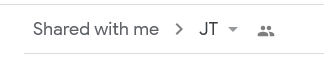

In [ ]:
## Load libraries & Auth & copy files

#@title Deeply copy shared folders in Google Drive
from google.colab import drive
import os

print('Mounting Google Drive...')
drive.mount('/content/gdrive')

src_path = '/content/gdrive/MyDrive/JT' #@param {type: 'string'}
assert os.path.exists(src_path), f"Source '{src_path}' doesn't exist!"

target_path = '/content/data' #@param {type: 'string'}
os.makedirs(target_path, exist_ok=True)
assert os.path.exists(target_path), f"Target '{target_path}' doesn't exist!"

target_path = os.path.join(target_path, os.path.basename(src_path))
print(f'Copying from "{src_path}" to "{target_path}"...')
os.makedirs(target_path, exist_ok=True)
!cp -rf "$src_path"/* "$target_path"  # also work when source is a shortcut


Mounting Google Drive...
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Copying from "/content/gdrive/MyDrive/JT" to "/content/data/JT"...


In [ ]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.
